# Introduction
Hello, In this notebook, I will apply two models of Deep Learning and one model of Machine Learning. These are The Logistic Regression, Artificial Neural Network(ANN), and Convolutional Neural Network(CNN) models. My main reason for making this notebook is because I want to learn Pytorch and so I will constitute the models with Pytorch API and I will apply them to the dataset. Before this, I prepared a project with Pytorch. In that project, I applied the Linear Regression model with PyTorch. I will share that project in this chapter. In this project, I continue to learn from where I left off. I improve myself in Deep Learning at the moment. This project is my seventeenth project on the way to improving myself and my sixth project in deep learning. I will share my previous projects in this section. In this learning path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/khotijahs1/digitrecognizer)

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)
- [Linear Regression With Pytorch](https://www.kaggle.com/code/ihsncnkz/linear-regression-with-pytorch)
- [My First Convolutional Neural Network(CNN) Work](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)
- [Predict With CNN Model](https://www.kaggle.com/code/ihsncnkz/predict-with-cnn-model)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)


# Content <a id="cont"></a>
- [Prepare Data For Models](#1)
- [Logistic Regression](#2)
- [Artificial Neural Network (ANN)](#3)
- [Convolutional neural network (CNN)](#4)
- [CONCLUSION](#5)

# Prepare Data For Models <a id="1"></a>
[Go Content](#cont) <br>

I will prepare the dataset for models in this chapter.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/digitrecognizer"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'train.csv', 'test.csv']


In [2]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

I read the dataset with the pandan library.

In [3]:
# Load data
train = pd.read_csv(r"../input/digitrecognizer/train.csv", dtype = np.float32)
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I split the dataset into features(pixels) and labels(numbers from 0 to 9)

In [4]:
# Data split
y = train.label.values # target 
x = train.loc[:, train.columns != "label"].values/255 #normalization features

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
y_test

array([8., 1., 9., ..., 3., 0., 9.], dtype=float32)

I create a Tensor from a numpy.ndarray.

In [8]:
X_Train = torch.from_numpy(x_train)
Y_Train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

X_Test = torch.from_numpy(x_test)
Y_Test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

I specify the batch size and the epoch.

In [9]:
# batch size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epoch = n_iters / (len(x_train) / batch_size)
num_epoch = int(num_epoch)

I specify data for Pytorch.

In [10]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(X_Train, Y_Train)
test = torch.utils.data.TensorDataset(X_Test, Y_Test)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

I visualize one of the images in the dataset

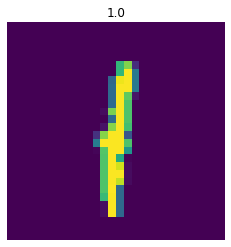

In [11]:
plt.imshow(x[12].reshape(28,28))
plt.axis("off")
plt.title(str(y[12]))
plt.savefig("graph.png")
plt.show()

# Logistic Regression <a id="2"></a>
[Go Content](#cont)

Firstly, I prepare the Logistic Regression model, and after I will training with the dataset. If you want my detailed project about Logistic Regression, [click here.](https://www.kaggle.com/code/ihsncnkz/logistic-regression)

In [12]:
# create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # linear model
        self.liner = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.liner(x)
        return out
    
# Determine input_dim and output_dim.
input_dim = 28*28
outout_dim = 10

# Create logistic regression model
lrmodel = LogisticRegressionModel(input_dim, outout_dim)

# Cross entropy loss
lrerror = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate_lr = 0.01
optimizer_lr = torch.optim.SGD(lrmodel.parameters(), lr = learning_rate_lr)

I train the model with the dataset.

In [13]:
# Training the model
LRcount = 0
LRloss_list = []
LRiteration_list = []
for epoch in range(num_epoch):
    for i, (imageslr, labelslr) in enumerate(train_loader):
        
        # Define variables
        LRtrain = Variable(imageslr.view(-1, 28*28))
        LRlabels = Variable(labelslr)
        
        # Clear gradients
        optimizer_lr.zero_grad()
        
        # Forward Propagation
        outputsLR = lrmodel(LRtrain)
        
        # Calculate softmax and cross entropy loss
        LRloss = lrerror(outputsLR, LRlabels)
        
        # Calculate gradients
        LRloss.backward()
        
        # Update parameters
        optimizer_lr.step()
        
        LRcount += 1
        
        # Prediction
        if LRcount % 50 == 0:
            # Calculate Accuracy
            LRcorrect = 0
            LRtotal = 0
            
            # Predict test dataset
            for imageslr, labelslr in test_loader:
                LRtest = Variable(imageslr.view(-1 , 28*28))
                
                # Forward propagation
                outputsLR = lrmodel(LRtest)
                
                # Get predictions from maximum value
                LRpredicted = torch.max(outputsLR.data, 1)[1]
                
                # total number of labels
                LRtotal += len(labelslr)
                
                # total correct predictions
                LRcorrect += (LRpredicted == labelslr).sum()
                
            LRaccuracy = 100 * LRcorrect / float(LRtotal)
            
            # store loss and iteration
            LRloss_list.append(LRloss.data)
            LRiteration_list.append(LRcount)
        if LRcount % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(LRcount, LRloss.data, LRaccuracy))

Iteration: 500  Loss: 0.7693545818328857  Accuracy: 83.75%
Iteration: 1000  Loss: 0.6687319874763489  Accuracy: 85.82142639160156%
Iteration: 1500  Loss: 0.4255567491054535  Accuracy: 87.01190185546875%
Iteration: 2000  Loss: 0.49407482147216797  Accuracy: 87.39286041259766%
Iteration: 2500  Loss: 0.4424237310886383  Accuracy: 88.02381134033203%
Iteration: 3000  Loss: 0.26138782501220703  Accuracy: 88.23809814453125%
Iteration: 3500  Loss: 0.40529099106788635  Accuracy: 88.58333587646484%
Iteration: 4000  Loss: 0.24576015770435333  Accuracy: 88.70237731933594%
Iteration: 4500  Loss: 0.5982665419578552  Accuracy: 89.0952377319336%
Iteration: 5000  Loss: 0.34463024139404297  Accuracy: 89.17857360839844%
Iteration: 5500  Loss: 0.3753644526004791  Accuracy: 89.42857360839844%
Iteration: 6000  Loss: 0.4954383373260498  Accuracy: 89.60713958740234%
Iteration: 6500  Loss: 0.2877064645290375  Accuracy: 89.66666412353516%
Iteration: 7000  Loss: 0.375620573759079  Accuracy: 89.78571319580078%
It

I visualize the results of the model.

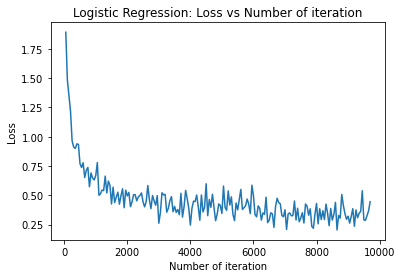

In [14]:
# visualization
plt.plot(LRiteration_list,LRloss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

# Artificial Neural Network (ANN) <a id="3"></a>
[Go Content](#cont)

Firstly, I prepare the Artificial Neural Network (ANN) model, and after I will train with the dataset. If you want my detailed project about Artificial Neural Network (ANN), [click here.](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)

In [15]:
# Create Artificial Neural Network (ANN)
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # linear function 1
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity1
        self.relu1 = nn.ReLU()
        
        # Linear fuction 2
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear Function 3
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearty 3
        self.elu3 = nn.ELU()
        
        # Linear Function 4 (readout)
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Linear Function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear Function 2
        out = self.fc2(out)
        # Non-Linearity 2
        out = self.tanh2(out)
        
        # Linear Function 3
        out = self.fc3(out)
        # Non-linearity 3
        out = self.elu3(out)
        
        # Linear Function
        out = self.fc4(out)
        return out
    
# Determine input_dim_ann, hidden_dim_ann, output_dim_ann
input_dim_ann = 28*28
hidden_dim_ann = 150
output_dim_ann = 10

# Create ann
ANNmodel = ANNModel(input_dim_ann, hidden_dim_ann, output_dim_ann)

# Cross Entropy Loss
ANNerror = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate_ann = 0.2
optimizer_ann = torch.optim.SGD(ANNmodel.parameters(), lr = learning_rate_ann)
        

I train the model with the dataset.I train the model with the dataset.

In [16]:
# ANN model training
count_ann = 0
loss_list_ann = []
iteration_list_ann = []
accuracy_list_ann = []

for epoch in range(num_epoch):
    for i, (images_ann, labels_ann) in enumerate(train_loader):
        
        train = Variable(images_ann.view(-1, 28*28))
        labels = Variable(labels_ann)
        
        # Clear Gradients
        optimizer_ann.zero_grad()
        
        # Forward Propagation
        outputs = ANNmodel(train)
        
        # Calculate softmax and ross entropy loss
        loss = ANNerror(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer_ann.step()
        
        count_ann += 1
        
        if count_ann % 50 == 0:
            # Calculate Accuracy
            correct_ann = 0
            total_ann = 0
            
            # predict test dataset
            for images_ann, labels_ann in test_loader:
                
                test = Variable(images_ann.view(-1, 28*28))
                
                # Forward propagation
                outputs = ANNmodel(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total_ann += len(labels_ann)
                
                # Total correct predictions
                correct_ann += (predicted == labels_ann).sum()
                
            accuracy_ann = 100 * correct_ann / float(total_ann)
            
            # store loss and iteration
            loss_list_ann.append(loss.data)
            iteration_list_ann.append(count_ann)
            accuracy_list_ann.append(accuracy_ann)
        if count_ann % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count_ann, loss.data, accuracy_ann))

Iteration: 500  Loss: 0.2280791848897934  Accuracy: 94.01190185546875 %
Iteration: 1000  Loss: 0.07199188321828842  Accuracy: 95.96428680419922 %
Iteration: 1500  Loss: 0.03540721535682678  Accuracy: 96.47618865966797 %
Iteration: 2000  Loss: 0.05780196189880371  Accuracy: 96.47618865966797 %
Iteration: 2500  Loss: 0.032590121030807495  Accuracy: 96.64286041259766 %
Iteration: 3000  Loss: 3.5428473949432373  Accuracy: 27.785715103149414 %
Iteration: 3500  Loss: 0.14418897032737732  Accuracy: 96.78571319580078 %
Iteration: 4000  Loss: 0.016309471800923347  Accuracy: 96.67857360839844 %
Iteration: 4500  Loss: 0.014430670998990536  Accuracy: 97.16666412353516 %
Iteration: 5000  Loss: 0.0036765781696885824  Accuracy: 97.0 %
Iteration: 5500  Loss: 0.007676479872316122  Accuracy: 97.07142639160156 %
Iteration: 6000  Loss: 0.0022567224223166704  Accuracy: 97.08333587646484 %
Iteration: 6500  Loss: 0.0019552879966795444  Accuracy: 97.30952453613281 %
Iteration: 7000  Loss: 0.003024861216545105

I visualize the results of the model.

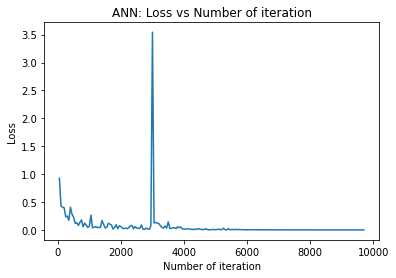

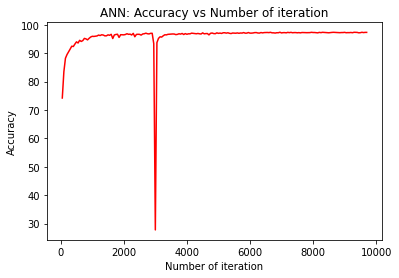

In [17]:
# visualization loss 
plt.plot(iteration_list_ann,loss_list_ann)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list_ann,accuracy_list_ann,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

# Convolutional neural network (CNN) <a id="4"></a>
[Go Content](#cont) <br>

Firstly, I prepare the Convolutional neural network (CNN) model, and after I will train with the dataset. If you want my detailed project about Convolutional neural network (CNN), [click here.](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)

In [18]:
# Import Library
import torch
import torch
from torch.autograd import Variable

# Create CNN Model With Pytorch
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, stride = 1, padding = 0)
        
        self.relu1 = nn.ReLU()
        
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        
        # Convolution  2
        self.cnn2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5, stride = 1, padding = 0)
        
        self.relu2 = nn.ReLU()
        
        self.maxpool2 = nn.MaxPool2d(kernel_size = 2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10)
        
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max Pool 1
        out = self.maxpool1(out)
        
        # Convolution 2
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max Pool 2
        out = self.maxpool2(out)
        
        # Flatten
        out = out.view(out.size(0), -1)
        
        # Linear function (readout)
        out = self.fc1(out)
        
        return out
    
# batch_size, Epoch and iteration
batch_size_cnn = 100
n_iters_cnn = 2500
num_epochs_cnn = n_iters_cnn / (len(x_train) / batch_size_cnn)
num_epochs_cnn = int(num_epochs_cnn)

# Pytorch train and test sets
train_cnn = torch.utils.data.TensorDataset(X_Train, Y_Train)
test_cnn = torch.utils.data.TensorDataset(X_Test, Y_Test)

# data loader
train_loader_cnn = torch.utils.data.DataLoader(train_cnn, batch_size = batch_size_cnn, shuffle = False)
test_loader_cnn = torch.utils.data.DataLoader(test_cnn, batch_size = batch_size_cnn, shuffle = False)

# Create CNN
model = CNNModel()

# Cross Entropy Loss
error_cnn = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate_cnn = 0.1
optimizer_cnn = torch.optim.SGD(model.parameters(), lr = learning_rate_cnn)

I train the model with the dataset.

In [19]:
# CNN Model training
count_cnn = 0
loss_list_cnn = []
iteration_list_cnn = []
accuracy_list_cnn = []
for epoch in range(num_epochs_cnn):
    for i, (images_cnn, labels_cnn) in enumerate(train_loader_cnn):
        
        ftrain_cnn = Variable(images_cnn.view(100, 1, 28, 28))
        flabels_cnn = Variable(labels_cnn)
        
        # Clear gradients
        optimizer_cnn.zero_grad()
        
        # Forward Propagation
        outputs_cnn = model(ftrain_cnn)
        
        # Calculate softmax and ross entropy loss
        loss_cnn = error_cnn(outputs_cnn, labels_cnn)
        
        # Calculating Gradients
        loss_cnn.backward()
        
        # Update parameters
        optimizer_cnn.step()
        
        count_cnn += 1
        
        if count_cnn % 50 == 0:
            # Calculate Accuracy
            correct_cnn = 0
            total_cnn = 0
            
            # Iterate through test dataset
            for images_cnn, labels_cnn in test_loader_cnn:
                
                ftest_cnn = Variable(images_cnn.view(100, 1, 28, 28))
                
                # Forward Propagation
                outputs_cnn = model(ftest_cnn)
                
                # Get Predictions From The Maximum Value
                predicted_cnn = torch.max(outputs_cnn.data, 1)[1]
                
                # Total number of labels
                total_cnn += len(labels_cnn)
                
                correct_cnn += (predicted_cnn == labels_cnn).sum()
                
            accuracy_cnn = 100 * correct_cnn / float(total_cnn)
            
            # Store loss and iteration
            loss_list_cnn.append(loss_cnn.data)
            iteration_list_cnn.append(count_cnn)
            accuracy_list_cnn.append(accuracy_cnn)
            
        if count_cnn % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count_cnn, loss_cnn.data, accuracy_cnn))

Iteration: 500  Loss: 0.10996179282665253  Accuracy: 96.66666412353516 %
Iteration: 1000  Loss: 0.03503936156630516  Accuracy: 97.76190185546875 %
Iteration: 1500  Loss: 0.02948560193181038  Accuracy: 97.89286041259766 %
Iteration: 2000  Loss: 0.012916158884763718  Accuracy: 98.23809814453125 %


I visualize the results of the model.

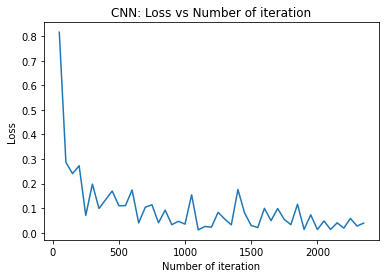

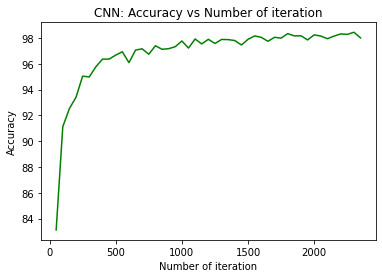

In [20]:
# Visualize Loss
plt.plot(iteration_list_cnn, loss_list_cnn)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# Visualize accuracy
plt.plot(iteration_list_cnn, accuracy_list_cnn, color = "green")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

# CONCLUSION <a id = "5"></a>
****
[Go Content](#cont) <br>
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.